In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


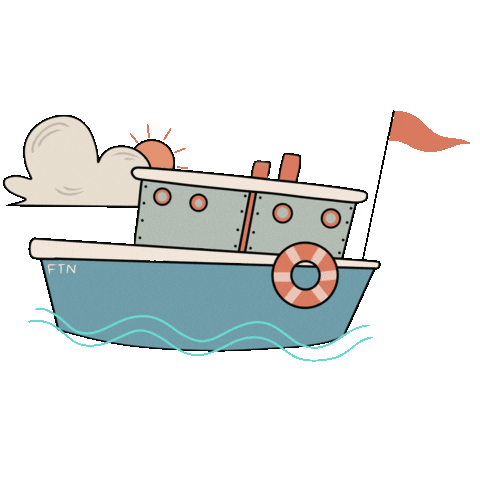

In [2]:
from IPython.display import Image, display

# For local image file
display(Image('/content/drive/MyDrive/Ship_Detection/giphy.gif'))

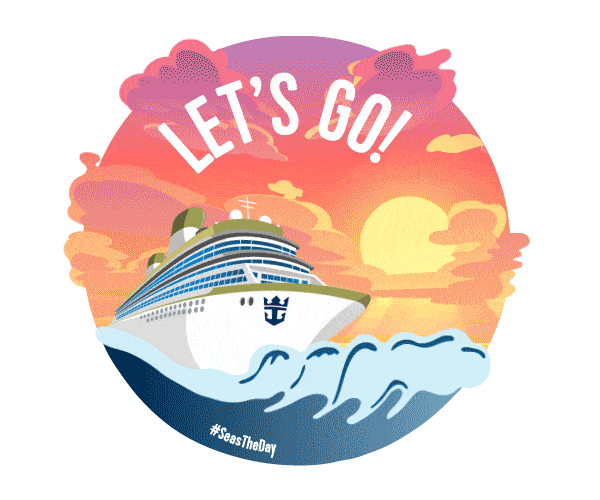

In [3]:
from IPython.display import Image, display

# For local image file
display(Image('/content/drive/MyDrive/Ship_Detection/giphy_s.gif'))

In [4]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics
!pip install squarify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 20.6 MB/s eta 0:00:00


In [5]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
!unzip '/content/drive/MyDrive/Ship_Detection/ships-aerial-images.zip'

Streaming output truncated to the last 5000 lines.
  inflating: ships-aerial-images/train/labels/x0595_png.rf.bc03f4a3bc686c5d239d8552ce57b5f5.txt  
  inflating: ships-aerial-images/train/labels/x0597_png.rf.918ed233995c3645a1ca8d14bf35a81c.txt  
  inflating: ships-aerial-images/train/labels/x0598_png.rf.94d8be92f98bf3ff36cf9f51b1e17bc9.txt  
  inflating: ships-aerial-images/train/labels/x0598_png.rf.a5b224c7880ba832c9d6d5aba3123e28.txt  
  inflating: ships-aerial-images/train/labels/x0599_png.rf.d215436f7b245cf0a244ab1c79118c83.txt  
  inflating: ships-aerial-images/train/labels/x0600_png.rf.6d245857b874aeb58d67bfee5f0d8837.txt  
  inflating: ships-aerial-images/train/labels/x0601_png.rf.0e026c3320e95fb914ecba76b230d115.txt  
  inflating: ships-aerial-images/train/labels/x0601_png.rf.3317e2c6b4dd295a5a16569782a22e20.txt  
  inflating: ships-aerial-images/train/labels/x0602_png.rf.641bc1b9bb9e0db302568085e3358b29.txt  
  inflating: ships-aerial-images/train/labels/x0602_png.rf.6de2341e

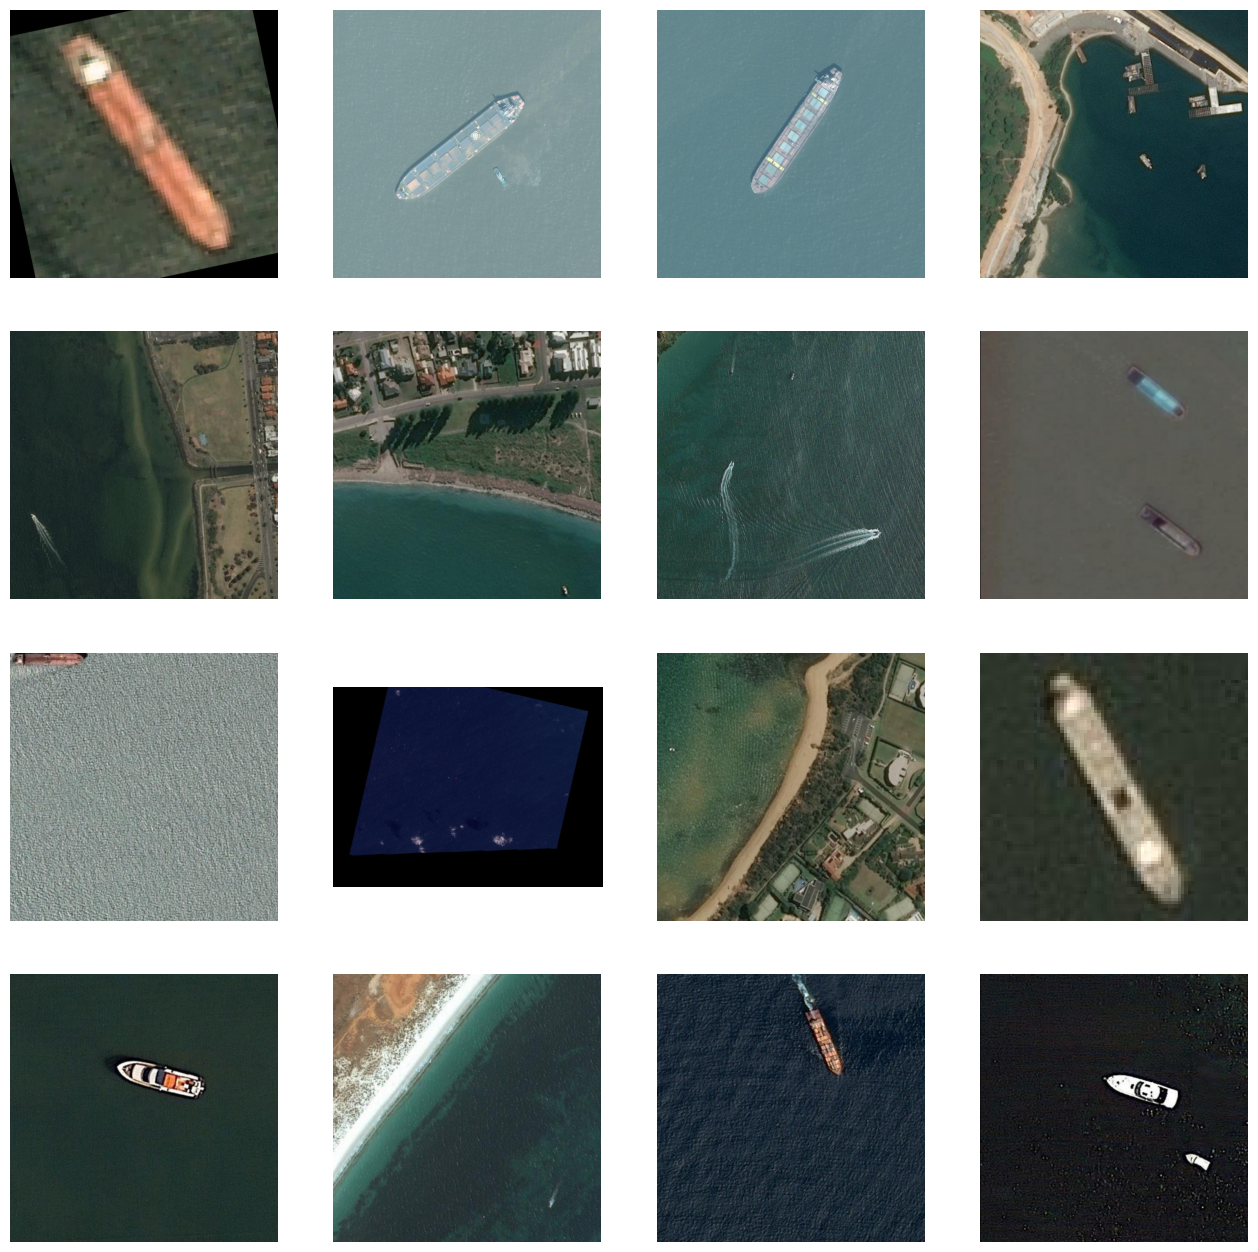

In [7]:
train_images = "/content/ships-aerial-images/train/images"
train_labels = "/content/ships-aerial-images/train/labels"


test_images = "/content/ships-aerial-images/test/images"
test_labels = "/content/ships-aerial-images/test/labels"


valid_images = "/content/ships-aerial-images/valid/images"
valid_labels = "/content/ships-aerial-images/valid/labels"


# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")



    # Loop over the labels and plot the object detections
    for label in labels:
      if len(label.split()) != 5:
          continue
          class_id, x_center, y_center, width, height = map(float, label.split())
          x_min = int((x_center - width/2) * image.shape[1])
          y_min = int((y_center - height/2) * image.shape[0])
          x_max = int((x_center + width/2) * image.shape[1])
          y_max = int((y_center + height/2) * image.shape[0])
          cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


In [8]:
from PIL import Image
import os

# Path to the directory containing images
image_directory = "/content/ships-aerial-images"

height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


# Model (Yolo v8) Training

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8x.pt')

# Train the model with the correct syntax
model.train(data='/content/ships-aerial-images/data.yaml',
            epochs=20,
            imgsz=416,  # Replace 'height' with 416 or your preferred size
            seed=42,
            batch=8,
            workers=4)


100%|██████████| 131M/131M [00:00<00:00, 365MB/s]


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/ships-aerial-images/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 27.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.9MB/s]


AMP: checks passed ✅


train: Scanning /content/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:05<00:00, 1901.09it/s]

train: WARNING ⚠️ /content/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: WARNING ⚠️ /content/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]


train: New cache created: /content/ships-aerial-images/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/ships-aerial-images/valid/labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:01<00:00, 1228.47it/s]


val: New cache created: /content/ships-aerial-images/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.51G       2.04      2.206      1.792         24        416: 100%|██████████| 1212/1212 [06:35<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:35<00:00,  3.81it/s]


                   all       2165       3720      0.247      0.207      0.129     0.0518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.06G       2.01      2.116      1.741         75        416: 100%|██████████| 1212/1212 [06:26<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.94it/s]


                   all       2165       3720      0.346      0.237      0.202     0.0953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.06G      1.889      1.926      1.647          9        416: 100%|██████████| 1212/1212 [06:21<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.89it/s]


                   all       2165       3720      0.266      0.276      0.206     0.0978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       4.1G      1.802      1.775      1.586          7        416: 100%|██████████| 1212/1212 [06:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.97it/s]


                   all       2165       3720      0.381      0.342      0.287       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       4.1G      1.742      1.657      1.544         20        416: 100%|██████████| 1212/1212 [06:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.95it/s]

                   all       2165       3720      0.402      0.331      0.291       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       4.1G       1.69      1.576      1.515         10        416: 100%|██████████| 1212/1212 [06:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.93it/s]

                   all       2165       3720      0.477      0.331      0.335      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.07G      1.654      1.512      1.494          7        416: 100%|██████████| 1212/1212 [06:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.92it/s]


                   all       2165       3720      0.455      0.335      0.337      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.06G      1.605      1.447      1.457         23        416: 100%|██████████| 1212/1212 [06:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.93it/s]

                   all       2165       3720      0.436       0.35      0.339      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       4.1G      1.574      1.387      1.442         13        416: 100%|██████████| 1212/1212 [06:20<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.89it/s]


                   all       2165       3720      0.459      0.351      0.353      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.19G      1.546       1.35      1.428         21        416: 100%|██████████| 1212/1212 [06:20<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.94it/s]

                   all       2165       3720      0.489      0.367      0.373      0.201


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.16G      1.487      1.229      1.409         14        416: 100%|██████████| 1212/1212 [06:19<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.91it/s]

                   all       2165       3720      0.492      0.333      0.358      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       4.1G      1.448      1.174       1.38          7        416: 100%|██████████| 1212/1212 [06:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.90it/s]

                   all       2165       3720      0.565      0.292      0.353      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.09G      1.419      1.123      1.351         10        416: 100%|██████████| 1212/1212 [06:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.94it/s]

                   all       2165       3720      0.444      0.401       0.39      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.18G      1.387      1.086      1.336         21        416: 100%|██████████| 1212/1212 [06:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.92it/s]

                   all       2165       3720      0.493      0.369      0.389      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.18G      1.364      1.051      1.317          8        416: 100%|██████████| 1212/1212 [06:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.91it/s]


                   all       2165       3720      0.516      0.373      0.398       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.16G      1.341      1.007      1.302          6        416: 100%|██████████| 1212/1212 [06:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.93it/s]


                   all       2165       3720      0.482      0.397      0.401      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.18G      1.311     0.9958      1.282          9        416: 100%|██████████| 1212/1212 [06:17<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.94it/s]

                   all       2165       3720      0.502      0.387      0.406      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.06G      1.288     0.9515      1.264          7        416: 100%|██████████| 1212/1212 [06:18<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.93it/s]


                   all       2165       3720      0.472      0.408      0.412      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.19G      1.259     0.9246      1.248          5        416: 100%|██████████| 1212/1212 [06:19<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.92it/s]

                   all       2165       3720      0.477      0.427      0.421       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.15G      1.234      0.896      1.236          5        416: 100%|██████████| 1212/1212 [06:18<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.93it/s]

                   all       2165       3720      0.492      0.424      0.427      0.255



20 epochs completed in 2.388 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 136/136 [00:34<00:00,  3.90it/s]


                   all       2165       3720      0.491      0.423      0.427      0.255
Speed: 0.1ms preprocess, 12.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e22c2ed02b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
trained_model_path = '/content/drive/MyDrive/Ship_Detection/saved_model.pt'  # Default location of best model weights
model.save(trained_model_path)

print(f"Model has been saved to {trained_model_path}")

Model has been saved to /content/drive/MyDrive/Ship_Detection/saved_model.pt


In [9]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/Ship_Detection/saved_model.pt')  # Update the path if needed


In [10]:
%matplotlib inline

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Dataset 'coco.yaml' images not found ⚠️, missing path '/content/datasets/coco/val2017.txt'


100%|██████████| 169M/169M [00:01<00:00, 115MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:23<00:00, 5095.69file/s]

Dataset download success ✅ (676.0s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]
val: Scanning /content/datasets/coco/labels/test2017... 0 images, 20288 backgrounds, 0 corrupt: 100%|██████████| 20288/20288 [00:48<00:00, 414.83it/s]

val: WARNING ⚠️ No labels found in /content/datasets/coco/labels/test2017.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


val: New cache created: /content/datasets/coco/labels/test2017.cache
WARNING ⚠️ No labels found in /content/datasets/coco/labels/test2017.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1268/1268 [16:39<00:00,  1.27it/s]

                   all      20288          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.2ms preprocess, 47.5ms inference, 0.0ms loss, 0.5ms postprocess per image
Saving runs/detect/val/predictions.json...

Evaluating pycocotools mAP using runs/detect/val/predictions.json and /content/datasets/coco/annotations/instances_val2017.json...
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
Loading and preparing results...
pycocotools unable to run: Results do not correspond to current coco set
Results saved to runs/detect/val


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Evaluate the model on the test dataset
metrics = model.val(conf=0.25, split='test')  # Ensure 'test' split is used

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/datasets/coco/labels/test2017.cache... 0 images, 20288 backgrounds, 0 corrupt: 100%|██████████| 20288/20288 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/datasets/coco/labels/test2017.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1268/1268 [16:40<00:00,  1.27it/s]

                   all      20288          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.2ms preprocess, 47.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Saving runs/detect/val3/predictions.json...

Evaluating pycocotools mAP using runs/detect/val3/predictions.json and /content/datasets/coco/annotations/instances_val2017.json...
loading annotations into memory...
Done (t=11.24s)
creating index...
index created!
Loading and preparing results...
pycocotools unable to run: Results do not correspond to current coco set
Results saved to runs/detect/val3


# Model's Performance


image 1/1 /content/ships-aerial-images/test/images/s0803_png.rf.be4cd93dd4ac7c762d1fcd44fd964438.jpg: 640x640 (no detections), 96.4ms
Speed: 4.0ms preprocess, 96.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/ships-aerial-images/test/images/x0706_png.rf.4ecad00182a24a8cfc1cf88835449944.jpg: 640x640 (no detections), 56.7ms
Speed: 3.3ms preprocess, 56.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/ships-aerial-images/test/images/d0882_png.rf.d8e84e64fe3c1add2649bd6ed676c671.jpg: 640x640 (no detections), 53.6ms
Speed: 3.4ms preprocess, 53.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/ships-aerial-images/test/images/x0936_png.rf.fded76c0749ef67375f658a774d590eb.jpg: 640x640 (no detections), 53.1ms
Speed: 3.4ms preprocess, 53.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/ships-aerial-images/test/images/GE_295_jpg.rf.9f2171

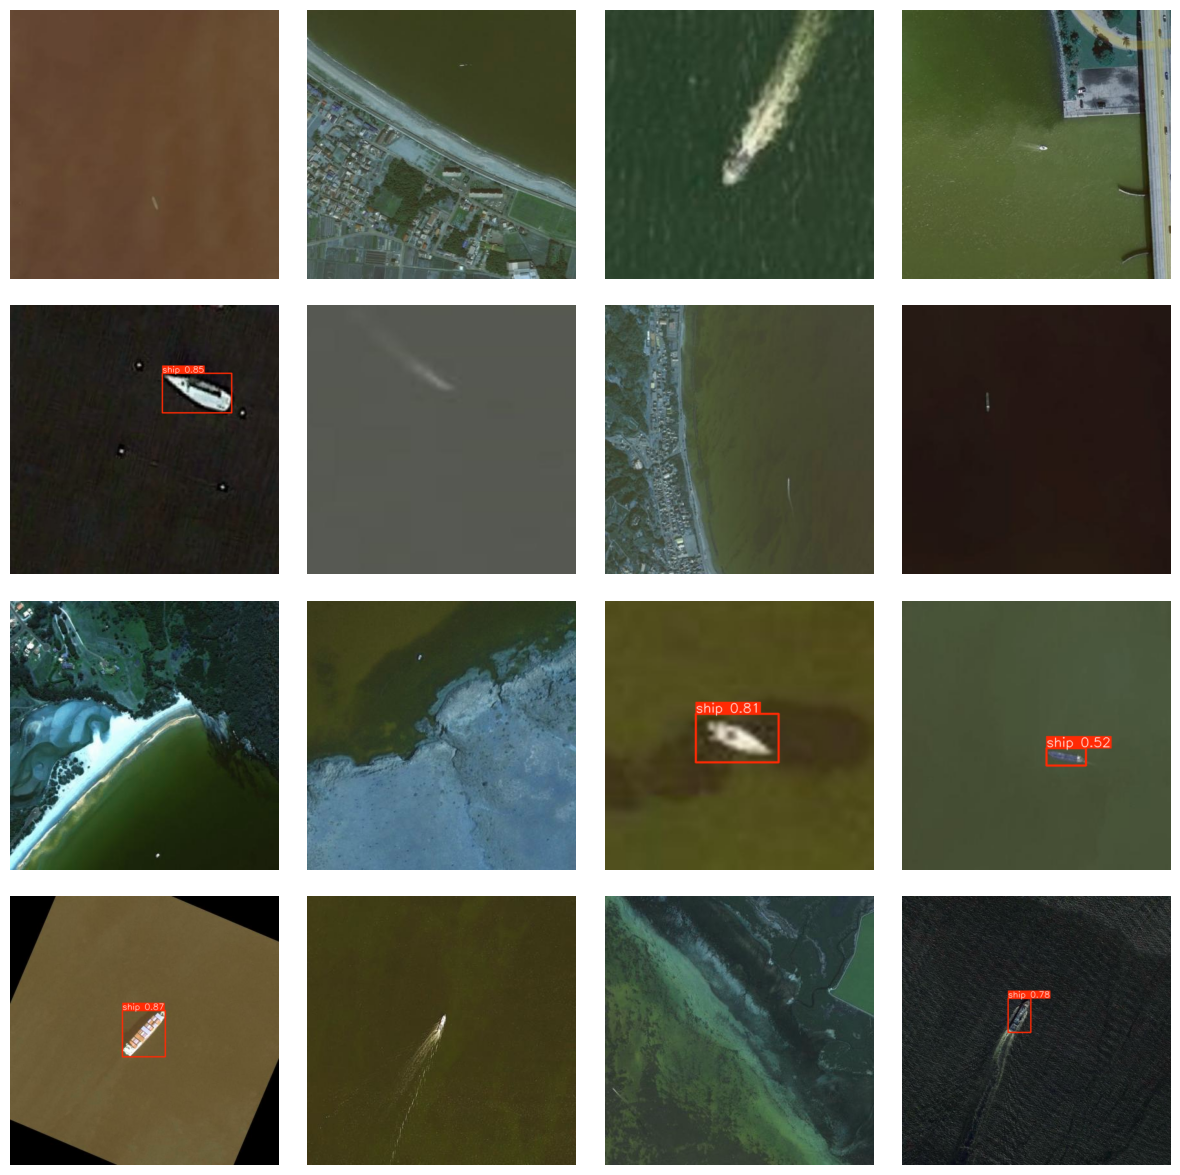

In [25]:
import random
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/drive/MyDrive/Ship_Detection/saved_model.pt')

# Define the directory where the test images are stored
test_image_dir = '/content/ships-aerial-images/test/images'

# Get the list of image files
image_files = os.listdir(test_image_dir)

# Select 16 random images for visualization
selected_images = random.sample(image_files, 16)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Loop through each selected image
for i, img_file in enumerate(selected_images):
    img_path = os.path.join(test_image_dir, img_file)

    # Perform detection
    results = model(img_path)
    detected_img = results[0].plot()  # Get the image with detections

    # Plot the detected image
    row, col = divmod(i, 4)
    axes[row, col].imshow(detected_img)
    axes[row, col].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()
